In [2]:
import cv2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os

In [46]:
### 출력 영상 크기
plt.rcParams["figure.figsize"] = (16,9)
### 출력 영상에 한글 표시
plt.rcParams['font.family'] = "Gulim"

In [9]:
hnu = cv2.imread(r'HNU_20211028.jpg')
hnu.shape

(500, 700, 3)

In [11]:
hnu_gausian = cv2.GaussianBlur(hnu, (3, 3), 0)

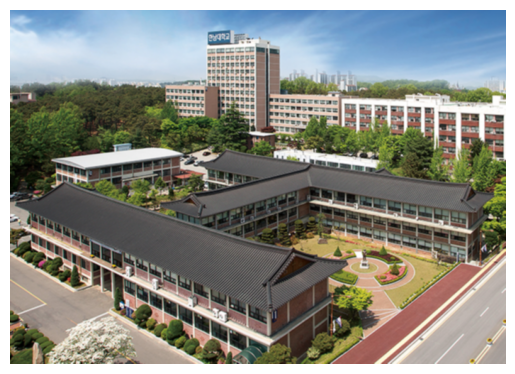

In [12]:
### 영상 출력
img_rgb = cv2.cvtColor(hnu_gausian, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [48]:
### 영상 저장
out_file = r'C:\Users\kr937\Desktop\drive\2023\F_W\Image Analysis\mid_term_quiz\\HNU_GB.jpg'
cv2.imwrite(out_file, hnu_gausian)

True

In [23]:
### 조각 영상
hnu_shape = hnu[30:50,280:315,:].copy()
height, width = hnu_shape.shape[:2]

In [24]:
hnu_shape.shape

(20, 35, 3)

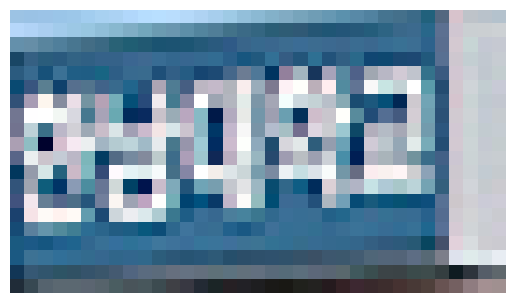

In [25]:
### 영상 출력
img_rgb = cv2.cvtColor(hnu_shape, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [49]:
### 영상 저장
out_file = r'C:\Users\kr937\Desktop\drive\2023\F_W\Image Analysis\mid_term_quiz\HNU_sub.jpg'
cv2.imwrite(out_file, hnu_shape)

True

In [26]:
### 감마보정 함수
def fn_gamma_correction(img, gamma=1):
    lookUpTable = np.empty((1, 256), np.uint8)
    for i in range(256) :
        lookUpTable[0, i] = np.clip(pow (i / 255.0, gamma) * 255.0, 0, 255)
    return cv2.LUT(img, lookUpTable)

In [28]:
hnu_gamma = fn_gamma_correction(hnu, 0.60)

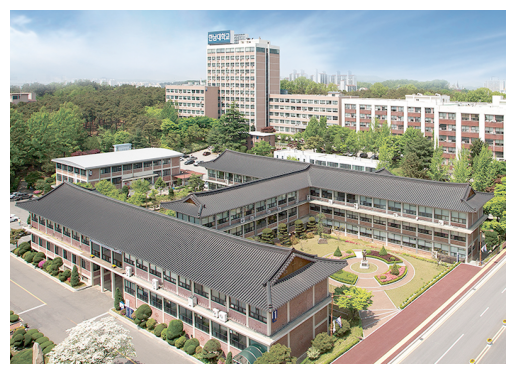

In [29]:
### 영상 출력
img_rgb = cv2.cvtColor(hnu_gamma, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [50]:
### 영상 저장
out_file = r'C:\Users\kr937\Desktop\drive\2023\F_W\Image Analysis\mid_term_quiz\HNU_gamma.jpg'
cv2.imwrite(out_file, hnu_gamma)

True

In [30]:
hnu_gray = cv2.cvtColor(hnu, cv2.COLOR_BGR2GRAY)
hnu_gray.shape

(500, 700)

In [31]:
ret, hnu_thresh = cv2.threshold(hnu_gray, 150, 255, cv2.THRESH_BINARY)

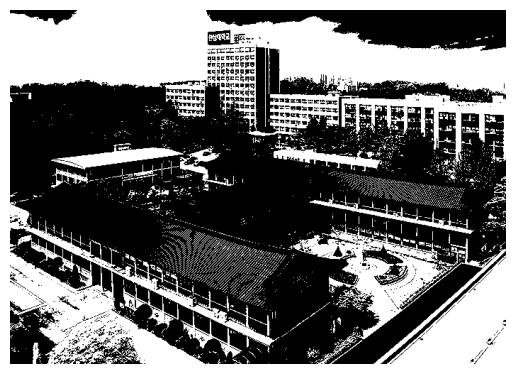

In [33]:
### 영상 출력
img_rgb = cv2.cvtColor(hnu_thresh, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [51]:
### 영상 저장
out_file = r'C:\Users\kr937\Desktop\drive\2023\F_W\Image Analysis\mid_term_quiz\HNU_thresh.jpg'
cv2.imwrite(out_file, hnu_thresh)

True

In [68]:
kernel = np.ones((3, 3), np.uint8)
hnu_kernel = cv2.morphologyEx(hnu_gray, cv2.MORPH_GRADIENT, kernel)

In [38]:
hnu_gray.shape

(500, 700)

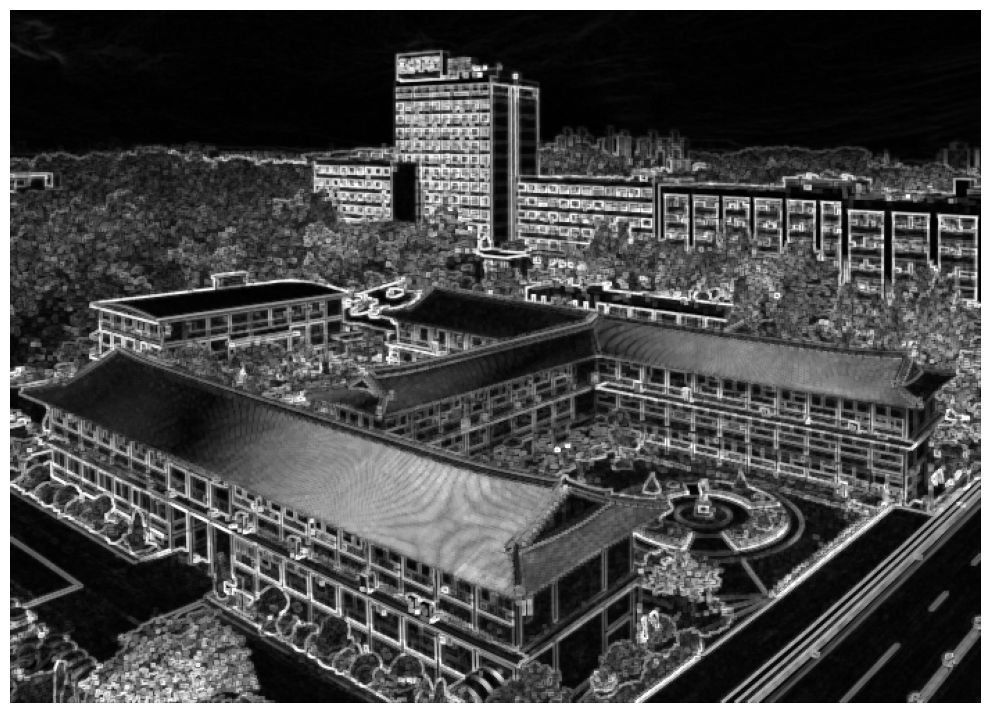

In [69]:
### 영상 출력
img_rgb = cv2.cvtColor(hnu_kernel, cv2.COLOR_GRAY2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [72]:
### 영상 저장
out_file = r'C:\Users\kr937\Desktop\drive\2023\F_W\Image Analysis\mid_term_quiz\HNU_gradient.jpg'
cv2.imwrite(out_file, hnu_kernel)

True

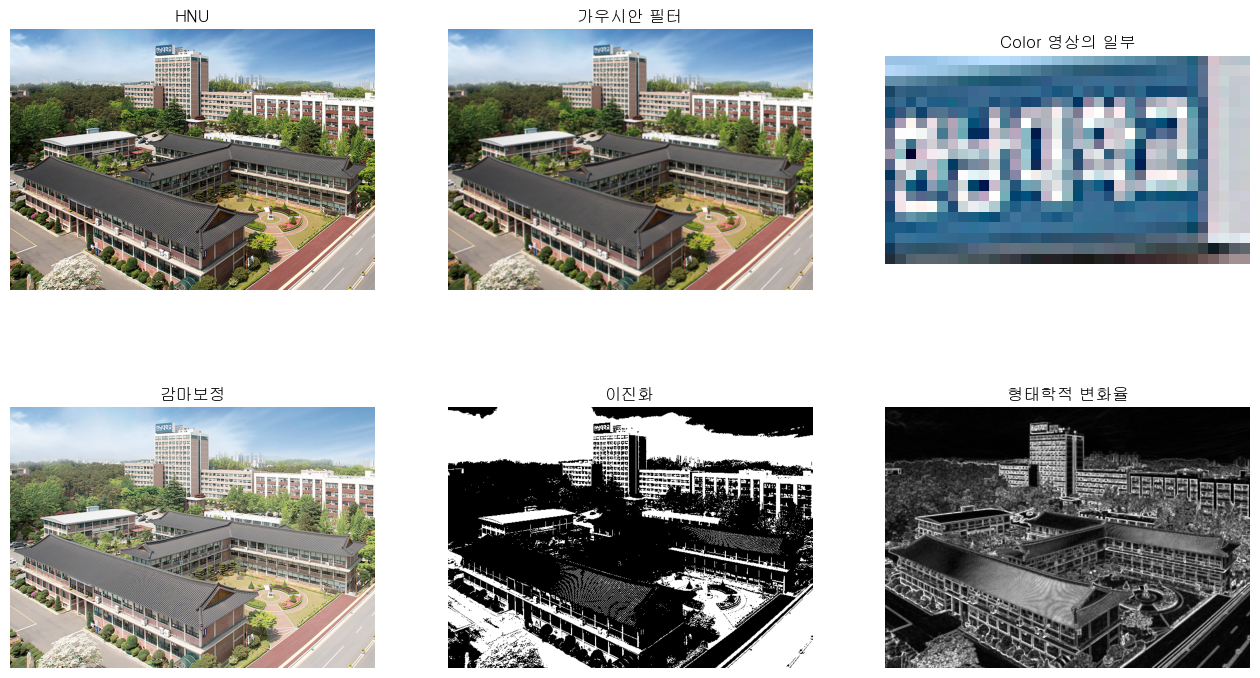

In [71]:
### 영상 출력
titles = ["HNU", "가우시안 필터", "Color 영상의 일부", "감마보정", "이진화", "형태학적 변화율"]
images = [hnu, hnu_gausian, hnu_shape, hnu_gamma, hnu_thresh, hnu_kernel]
for i in range(len(images)):
    img_rgb = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.subplot(2, 3, i+1)
    plt.imshow(img_rgb)
    plt.title(titles[i])
    plt.axis('off')
plt.show()